## Importing necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [3]:
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)

In [4]:
Forestfire = pd.read_csv("forestfires.csv")
Forestfire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,small


## Data Undersatnding

In [5]:
Forestfire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print("Shape         :" ,Forestfire.shape)
print("\nNull Values :\n",Forestfire.isnull().sum())
print("\ndtyes       : \n",Forestfire.dtypes)

Shape         : (517, 31)

Null Values :
 month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

dtyes       : 
 month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat        

In [7]:
Forestfire.size_category.unique()

array(['small', 'large'], dtype=object)

## Data Preparation

In [8]:
Forestfire.drop(['month','day'],axis=1,inplace=True)

In [9]:
Forestfire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [10]:
Forestfire.shape

(517, 29)

In [11]:
le = LabelEncoder()
Forestfire['size_category'] = le.fit_transform(Forestfire.size_category)

In [12]:
Forestfire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [13]:
Forestfire.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category      int32
dtype: object

## Model Building

In [14]:
X = Forestfire.drop('size_category',axis=1)
y = Forestfire[['size_category']]

In [15]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
y

,size_category
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [17]:
X.shape,y.shape

((517, 28), (517, 1))

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=15,stratify = y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((413, 28), (104, 28), (413, 1), (104, 1))

## Model Training without scaling | Model Testing | Model Evaluation

## Kernel = Linear 

In [19]:
foreset_svc = SVC(kernel='linear')
foreset_svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
y_pred_train = foreset_svc.predict(X_train)
y_pred_test = foreset_svc.predict(X_test)

Overall Accuracy :  0.9904
Precision        :  1.0
Recall           :  0.9868
AUC Score        :  0.9934
Confusion Matrix :
 [[28  0]
 [ 1 75]]
Confusion Matrix :


Text(0.5, 1, 'Prediction Vs Actual')

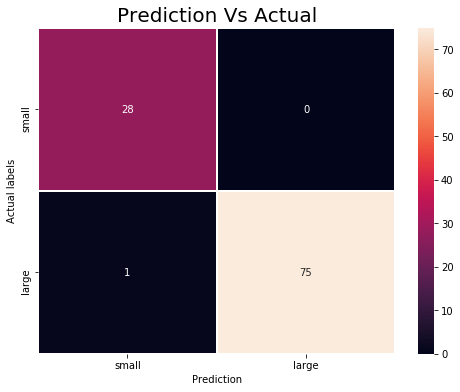

In [21]:
print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred_test),4))
print("Precision        : ",round(precision_score(y_test,y_pred_test),4))
print("Recall           : ",round(recall_score(y_test,y_pred_test),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred_test),4))
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred_test))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g',
            xticklabels=('small', 'large'),
            yticklabels=('small', 'large'),
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)


## kernel = rbf 

Overall Accuracy :  0.7404
Precision        :  0.7379
Recall           :  1.0
AUC Score        :  0.5179
Confusion Matrix :
 [[ 1 27]
 [ 0 76]]
Confusion Matrix :


Text(0.5, 1, 'Prediction Vs Actual')

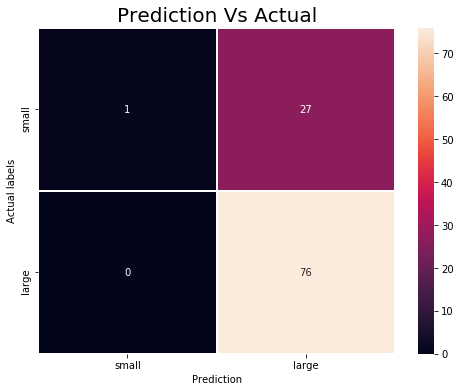

In [22]:
foreset_svc = SVC(kernel='rbf')
foreset_svc.fit(X_train,y_train)
y_pred_test = foreset_svc.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred_test),4))
print("Precision        : ",round(precision_score(y_test,y_pred_test),4))
print("Recall           : ",round(recall_score(y_test,y_pred_test),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred_test),4))
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred_test))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g',
            xticklabels=('small', 'large'),
            yticklabels=('small', 'large'),
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

## Kernel  = Polynomial

Overall Accuracy :  0.7404
Precision        :  0.7379
Recall           :  1.0
AUC Score        :  0.5179
Confusion Matrix :
 [[ 1 27]
 [ 0 76]]
Confusion Matrix :


Text(0.5, 1, 'Prediction Vs Actual')

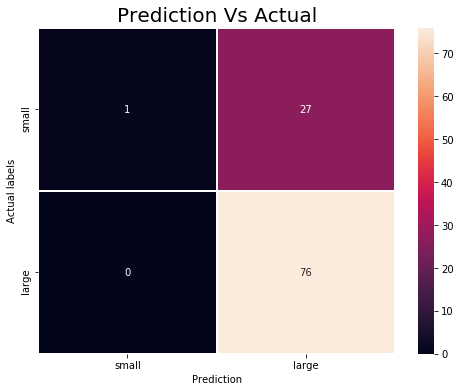

In [23]:
foreset_svc = SVC(kernel='poly',degree=1)
foreset_svc.fit(X_train,y_train)
y_pred_test = foreset_svc.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred_test),4))
print("Precision        : ",round(precision_score(y_test,y_pred_test),4))
print("Recall           : ",round(recall_score(y_test,y_pred_test),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred_test),4))
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred_test))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g',
            xticklabels=('small', 'large'),
            yticklabels=('small', 'large'),
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)


## Model Training with scaling | Model Testing | Model Evaluation

In [24]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [25]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,test_size=0.20,random_state=15,stratify = y)
X_train_scaled.shape,X_test_scaled.shape,y_train_scaled.shape,y_test_scaled.shape

((413, 28), (104, 28), (413, 1), (104, 1))

## Kernel = linear

Overall Accuracy :  0.9038
Precision        :  0.8837
Recall           :  1.0
AUC Score        :  0.8214
Confusion Matrix :
 [[18 10]
 [ 0 76]]
Confusion Matrix :


Text(0.5, 1, 'Prediction Vs Actual')

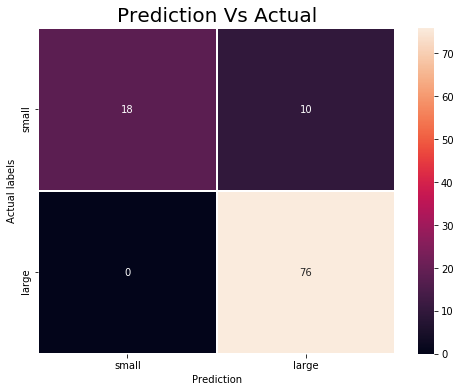

In [26]:
foreset_svc_scaled = SVC(kernel='linear')
foreset_svc_scaled.fit(X_train_scaled,y_train_scaled)
y_pred_scaled = foreset_svc_scaled.predict(X_test_scaled)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred_scaled),4))
print("Precision        : ",round(precision_score(y_test,y_pred_scaled),4))
print("Recall           : ",round(recall_score(y_test,y_pred_scaled),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred_scaled),4))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_scaled))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_scaled)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g',
            xticklabels=('small', 'large'),
            yticklabels=('small', 'large'),
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

## kernel = rbf

Overall Accuracy :  0.7404
Precision        :  0.7379
Recall           :  1.0
AUC Score        :  0.5179
Confusion Matrix :
 [[ 1 27]
 [ 0 76]]
Confusion Matrix :


Text(0.5, 1, 'Prediction Vs Actual')

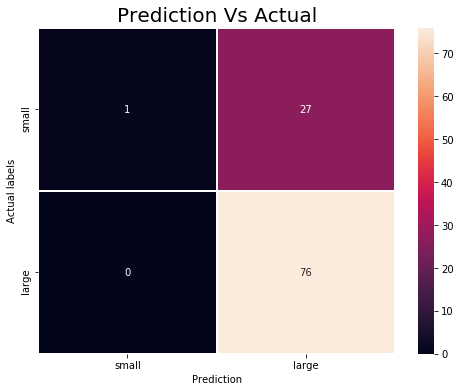

In [27]:
foreset_svc_scaled = SVC(kernel='rbf')
foreset_svc_scaled.fit(X_train_scaled,y_train_scaled)
y_pred_scaled = foreset_svc_scaled.predict(X_test_scaled)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred_scaled),4))
print("Precision        : ",round(precision_score(y_test,y_pred_scaled),4))
print("Recall           : ",round(recall_score(y_test,y_pred_scaled),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred_scaled),4))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_scaled))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_scaled)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g',
            xticklabels=('small', 'large'),
            yticklabels=('small', 'large'),
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

## kernel = polynonimal

Overall Accuracy :  0.7596
Precision        :  0.7525
Recall           :  1.0
AUC Score        :  0.5536
Confusion Matrix :
 [[ 3 25]
 [ 0 76]]
Confusion Matrix :


Text(0.5, 1, 'Prediction Vs Actual')

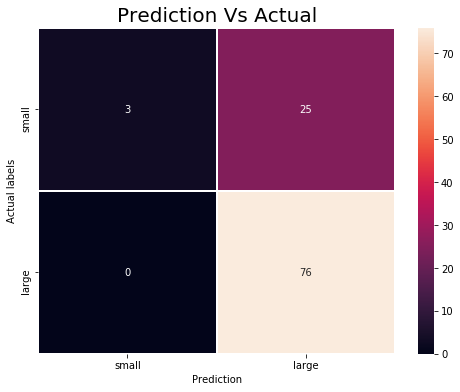

In [28]:
foreset_svc_scaled = SVC(kernel='poly',degree=1)
foreset_svc_scaled.fit(X_train_scaled,y_train_scaled)
y_pred_scaled = foreset_svc_scaled.predict(X_test_scaled)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred_scaled),4))
print("Precision        : ",round(precision_score(y_test,y_pred_scaled),4))
print("Recall           : ",round(recall_score(y_test,y_pred_scaled),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred_scaled),4))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_scaled))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_scaled)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g',
            xticklabels=('small', 'large'),
            yticklabels=('small', 'large'),
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

## As per above condition 
### with kernel = linear ,without scaling we are getting 99.04% Accuarcy 